In [117]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [421]:
Class_params = [[(10, 10), (-10, 10)], [(-10, 5), (3, 10)], [(5, 10), (20, 10)]]
#Class_params = [[(10, 10), (-10, 10)], [(-10, 5), (3, 10)]]
N = len(Class_params)
Size = 500
D = 2
Train_size = 0.8

In [422]:
Y = [0]*Size
X = np.zeros([N*Size, D])
for d in range(D):
    X[:Size, d] = np.random.normal(Class_params[0][d][0], Class_params[0][d][1], size=(Size,))
for i in range(1, N):
    for d in range(D):
        X[i*Size:(i+1)*Size, d] = np.random.normal(Class_params[i][d][0], Class_params[i][d][1], size=(Size,))
    Y +=[i]*Size
Y = np.array(Y)

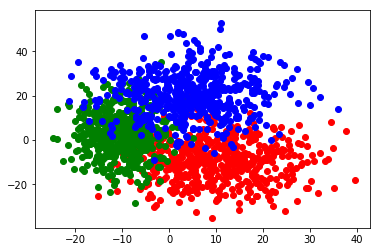

In [423]:
colors = ['r', 'g', 'b', 'y']
for i in range(0, N):
    plt.scatter(X[i*Size: (i+1)*Size, 0], X[i*Size: (i+1)*Size, 1], c=colors[i])
plt.show()

In [424]:
indexes = np.random.shuffle([range(N*Size)])

In [425]:
X_shuffled = X[indexes][0]
Y_shuffled = Y[indexes][0]

In [426]:
X_shuffled.shape, Y_shuffled.shape

((1500, 2), (1500,))

In [427]:
model = Perceptron()

In [428]:
model.fit(X_shuffled[:int(Train_size*len(X_shuffled))],\
          Y_shuffled[:int(Train_size*len(X_shuffled))])

D:\programs\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [429]:
prediction = model.predict(X[int(Train_size*len(X_shuffled)):])

In [430]:
accuracy_score(prediction, Y[int(Train_size*len(X_shuffled)):])

0.8833333333333333

In [431]:
def getEquatations(X, Y, N):
    coef = []
    for i in range(N):
        model.fit(X, (Y==i).astype(int))
        coef += [model.coef_]
    return coef

In [432]:
equatations = getEquatations(X_shuffled, Y_shuffled, N)
equatations

D:\programs\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[array([[21.39290752, -7.96113155]]),
 array([[-31.2574386 , -20.12033592]]),
 array([[ 1.25302621, 27.93685659]])]

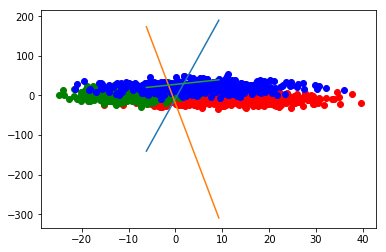

In [435]:
colors = ['r', 'g', 'b', 'y']
for i in range(0, N):
    plt.scatter(X[i*Size: (i+1)*Size, 0], X[i*Size: (i+1)*Size, 1], c=colors[i])
X_max, X_min = X[:,0].max(), X[:,0].min() 
x = [np.arange(X_min / 4, X_max / 4, (X_max - X_min)/100)][0]
for eq in equatations:
    plt.plot(x, eq[0][0]*x+eq[0][1])
plt.show()

In [376]:
equatations[0][0][0]

11.582750340879155

In [396]:
x = [np.arange(0, 3, 0.01)]
len(x)

1